# FAIRe Qualitäts-KPIs
Autor: Florian Weiß 
Datum: 24.20.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie verhalten sich die Lieferzeiten und Gewichte von Lego-Fahrzeugen, bei denen der Radstand drastisch unterschiedlich ist?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Im ersten Versuch sollen die KPIs eines Ausgangsfahrzeugs ermittelt werden, welches aus grundlegenden Lego-Bauteilen besteht und einen relativ kurzen Radstand besitzt. Im darauffolgenden Versuch wird der Radstand deutlich verlängert, um den Unterschied in den KPIs zu ermitteln.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Bild des ersten Fahrzeugs](Fahrzeug1Weiss.png)


Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Die Basis des Fahrzeugs bilden zwei klassische Lego-Rahmen, durch die an beiden eintfernten Enden die Achsen mit den Rädern auf den Außenseiten der Rahmen verlaufen. Lediglich eine Achse ist über ein Zwei-Zahnrad-Gewinde angetrieben, wobei der Motor sich direkt über der Achse befindet und über Verbindungsblöcke am Ende des hinteren Rahmens fixiert ist. Über der nicht angetriebenen Achse liegt die Batteriebox, welche über zwei Pins am vorderen Rahmen befestigt ist. Die Hauptfahrrichtung ist in der Abbildung nach rechts, daher wird die rechte Achse als vordere, die linke als hintere bezeichnet.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [2]:
# initialize components
    # axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
front_axle = LegoComponent("front axle", axles["50451"], {'color':'red'})
rear_axle = LegoComponent("rear axle", axles["50451"], {'color':'red'})
engine_axle = LegoComponent("engine axle", axles["32073"], {'color':'red'})

    # wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
wheelfl = LegoComponent("wheel front left", wheels["56904c02"],{'color':'black'})
wheelfr = LegoComponent("wheel front right", wheels["56904c02"],{'color':'black'})
wheelrl = LegoComponent("wheel rear left", wheels["56904c02"],{'color':'black'})
wheelrr = LegoComponent("wheel rear right", wheels["56904c02"],{'color':'black'})

    # gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
axle_gear = LegoComponent("axle gear", gears["32269"],{'color':'red'})
engine_gear = LegoComponent("engine gear", gears["32269"],{'color':'red'})

    # battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery = LegoComponent("battery", batteries["2847c01"],{'color':'black'})

    # motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor = LegoComponent("motor", motors["8883-1"],{'color':'red'})

    # frame, beams and pins
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
mainframef = LegoComponent("mainframe front", frame["39790"],{'color':'red'})
mainframer = LegoComponent("mainframe rear", frame["39790"],{'color':'red'})
framepinl = LegoComponent("frame connection pin left", frame["3673"],{'color':'red'})
framepinr = LegoComponent("frame connection pin right", frame["3673"],{'color':'red'})
batterypinl = LegoComponent("engine pin left", frame["3673"],{'color':'red'})
batterypinr = LegoComponent("engine pin right", frame["3673"],{'color':'red'})
        #motoraufbau
motorpinl = LegoComponent("motor beams pin left", frame["32556"],{'color':'red'})
motorpinr = LegoComponent("motor beams pin right", frame["32556"],{'color':'red'})
liftarm = LegoComponent("liftarm", frame["32524"],{'color':'red'})
beam1 = LegoComponent("beam one", frame["3702"],{'color':'red'})
beam2 = LegoComponent("beam two", frame["3702"],{'color':'red'})
beam3 = LegoComponent("beam three", frame["3702"],{'color':'red'})
beam4 = LegoComponent("beam four", frame["3702"],{'color':'red'})

In [3]:
# aggregate components

    # front axle
front_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front axle assembly",
    assembly_method="stick together like lego blocks",)
front_axle_assembly.add([front_axle, wheelfl, wheelfr])

    # rear axle
rear_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "rear axle assembly",
    assembly_method="stick together like lego blocks",)
rear_axle_assembly.add([rear_axle, wheelrl, wheelrr, axle_gear])

    # motor
motor_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motor axle assembly",
    assembly_method="stick together like lego blocks",)
motor_assembly.add([motor, engine_axle, engine_gear])

    # motorstructure (structure that holds the motor in place)
motorstructure_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motorstructure assembly",
    assembly_method="stick together like lego blocks",)
motorstructure_assembly.add([motorpinl, motorpinr, liftarm, beam1, beam2, beam3, beam4])

    # batterystructure
batterystructure_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "batterystructure assembly",
    assembly_method="stick together like lego blocks",)
batterystructure_assembly.add([battery, batterypinl, batterypinr])

    # framestructure
framestructure_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "framestructure assembly",
    assembly_method="stick together like lego blocks",)
framestructure_assembly.add([mainframef, mainframer, framepinl, framepinr])

# assemble system

Fahrzeug1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Fahrzeug1")
Fahrzeug1.add([framestructure_assembly, front_axle_assembly, rear_axle_assembly, motor_assembly, motorstructure_assembly, 
               batterystructure_assembly])


### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

Der KPI der ersten Qualitätsdimension, des Aufwandes, ist der Preis. Ist dieser zu hoch, wird das Fahrzeug für Kund:innen unattraktiv. Dies ist bei einem solchen Lego-Fahrzeug besonders wichtig, da es nur sehr eingeschränkte Fähigkeiten hat: es kann lediglich in einer geraden Linie vorwärts und Rückwärts fahren. 

Berechnungsvorschrift: 
$$
Gesamtpreis = \sum_{i=1}^{Anzahl Komponenten} p_i
$$
$$
p_i = Komponenteneinzelpreis 
$$

Der KPI der zweiten Qualitätsdimension, der Verfügbarkeit, ist die Lieferzeit. Sollte diese zu hoch sein, schauen sich Kund:innen eventuell bei anderen Marken für Steckbausteine nach geringeren Lieferzeiten um.

Berechnungsvorschrift:
$$
Lieferzeit = max([t_i])
$$
$$
t_i = Einzellieferzeiten der Komponenten 
$$

Der KPI der dritten Qualitätsdimension, der Akzeptanz, ist das Gesamtgewicht des Fahrzeugs. Bei der Zielgruppe des Fahrzeugs handelt es sich um junge Kinder, die ihre ersten Erfahrungen mit technischen Komponenten machen. Dafür sollte gewährleistet sein, dass das Spielzeug nicht allzu schwer ist, ansonsten könnte den Kindern die Lust am Experimentieren mit dem Fahrzeug vergehen, was unbedingt zu vermeiden ist!

Berechnungsvorschrift:
$$
Gesamtgewicht = \sum_{i=1}^{Anzahl Komponenten} g_i
$$
$$
g_i = Komponenteneinzelgewicht
$$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [4]:
# calculate the KPIs for your car

# Berechnung des KPI Gewicht
total_mass = calculation_rules.kpi_mass(Fahrzeug1)
Fahrzeug1.properties["mass [g]"] = total_mass

# Berechnung des KPI Preis
total_price = calculation_rules.kpi_price(Fahrzeug1)
Fahrzeug1.properties["price [Euro]"] = total_price

# Berechnung des KPI Lieferzeit
total_deliv = calculation_rules.kpi_deliv(Fahrzeug1)
Fahrzeug1.properties["delivery time [days]"] = total_deliv

In [5]:
# print your KPIs

print("Gesamtmasse: ", total_mass, "g")
print("Gesamtpreis: ", total_price, "Euro")
print("Gesamtlieferzeit: ", total_deliv, "days")

Gesamtmasse:  308.15000000000003 g
Gesamtpreis:  29.331000000000017 Euro
Gesamtlieferzeit:  13 days


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [6]:
# export car and its properties

with open("Fahrzeug1.json", "w") as fp:
    json.dump(Fahrzeug1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Das Versuchsziel des zweiten Versuchs liegt darin, besonders das Gewicht des Fahrzeugs zu verringern. Um ein bestmögliches Spielerlebnis zu gewährleisten, sollte dieses unter 300 Gramm liegen. Dafür werden die beiden Hauptrahmen auf lediglich einen Rahmen reduziert.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Bild des zweiten Fahrzeugs](Fahrzeug2Weiss.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Der Aufbau des zweiten Fahrzeugs basiert auf lediglich einem klassischen Lego Rahmen, in den die anderen Komponenten zusammengeschoben wurden. Weiterhin wird nur die Hinterachse vom darüber liegenden Motor angetrieben, während über der vorderen Achse die Batteriebox platziert ist.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [7]:
# initialize components
    # axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
front_axle = LegoComponent("front axle", axles["50451"], {'color':'red'})
rear_axle = LegoComponent("rear axle", axles["50451"], {'color':'red'})
engine_axle = LegoComponent("engine axle", axles["32073"], {'color':'red'})

    # wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
wheelfl = LegoComponent("wheel front left", wheels["56904c02"],{'color':'black'})
wheelfr = LegoComponent("wheel front right", wheels["56904c02"],{'color':'black'})
wheelrl = LegoComponent("wheel rear left", wheels["56904c02"],{'color':'black'})
wheelrr = LegoComponent("wheel rear right", wheels["56904c02"],{'color':'black'})

    # gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
axle_gear = LegoComponent("axle gear", gears["32269"],{'color':'red'})
engine_gear = LegoComponent("engine gear", gears["32269"],{'color':'red'})

    # battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery = LegoComponent("battery", batteries["2847c01"],{'color':'black'})

    # motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor = LegoComponent("motor", motors["8883-1"],{'color':'red'})

    # frame, beams and pins
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
mainframe = LegoComponent("mainframe", frame["39790"],{'color':'red'})
batterypinl = LegoComponent("engine pin left", frame["3673"],{'color':'red'})
batterypinr = LegoComponent("engine pin right", frame["3673"],{'color':'red'})
        #motoraufbau
motorpinl = LegoComponent("motor beams pin left", frame["32556"],{'color':'red'})
motorpinr = LegoComponent("motor beams pin right", frame["32556"],{'color':'red'})
liftarm = LegoComponent("liftarm", frame["32524"],{'color':'red'})
beam1 = LegoComponent("beam one", frame["3702"],{'color':'red'})
beam2 = LegoComponent("beam two", frame["3702"],{'color':'red'})
beam3 = LegoComponent("beam three", frame["3702"],{'color':'red'})
beam4 = LegoComponent("beam four", frame["3702"],{'color':'red'})

In [8]:
# aggregate components

    # front axle
front_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front axle assembly",
    assembly_method="stick together like lego blocks",)
front_axle_assembly.add([front_axle, wheelfl, wheelfr])

    # rear axle
rear_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "rear axle assembly",
    assembly_method="stick together like lego blocks",)
rear_axle_assembly.add([rear_axle, wheelrl, wheelrr, axle_gear])

    # motor
motor_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motor axle assembly",
    assembly_method="stick together like lego blocks",)
motor_assembly.add([motor, engine_axle, engine_gear])

    # motorstructure (structure that holds the motor in place)
motorstructure_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motorstructure assembly",
    assembly_method="stick together like lego blocks",)
motorstructure_assembly.add([motorpinl, motorpinr, liftarm, beam1, beam2, beam3, beam4])

    # batterystructure
batterystructure_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "batterystructure assembly",
    assembly_method="stick together like lego blocks",)
batterystructure_assembly.add([battery, batterypinl, batterypinr])

# assemble system

Fahrzeug2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Fahrzeug1")
Fahrzeug2.add([mainframe, front_axle_assembly, rear_axle_assembly, motor_assembly, motorstructure_assembly, 
               batterystructure_assembly])

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [9]:
# calculate the KPIs for your car

# Berechnung des KPI Gewicht
total_mass = calculation_rules.kpi_mass(Fahrzeug2)
Fahrzeug2.properties["mass [g]"] = total_mass

# Berechnung des KPI Preis
total_price = calculation_rules.kpi_price(Fahrzeug2)
Fahrzeug2.properties["price [Euro]"] = total_price

# Berechnung des KPI Lieferzeit
total_deliv = calculation_rules.kpi_deliv(Fahrzeug2)
Fahrzeug2.properties["delivery time [days]"] = total_deliv

In [10]:
# print your KPIs

print("Gesamtmasse: ", total_mass, "g")
print("Gesamtpreis: ", total_price, "Euro")
print("Gesamtlieferzeit: ", total_deliv, "days")

Gesamtmasse:  294.87 g
Gesamtpreis:  27.121000000000016 Euro
Gesamtlieferzeit:  13 days


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [11]:
# export car and its properties
with open("Fahrzeug2.json", "w") as fp:
    json.dump(Fahrzeug2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

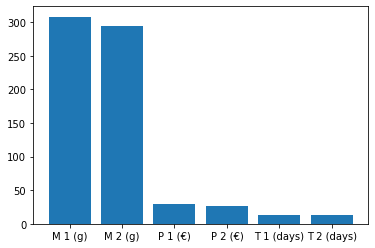

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the data, save diagramm as svg-file
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["M 1 (g)", "M 2 (g)", "P 1 (€)", "P 2 (€)", "T 1 (days)", "T 2 (days)"])
plot = np.array([Fahrzeug1.properties["mass [g]"], Fahrzeug2.properties["mass [g]"], Fahrzeug1.properties["price [Euro]"], Fahrzeug2.properties["price [Euro]"], Fahrzeug1.properties["delivery time [days]"], Fahrzeug2.properties["delivery time [days]"]])

plt.bar(x, plot)
plt.show()
plt.savefig("kpis Florian Weiss.svg", format= "svg" )

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Es wird deutlich, dass zwei von drei KPIs in der Tat verbessert werden konnten: Der Preis und das Gesamtgewicht des Fahrzeugs haben sich reduziert, während die Lieferdauer gleich lang geblieben ist. Besonders die Verbesserung des Gesamtgewichts auf weniger als 300 Gramm ist ein signifikanter Schritt und stellt die Erfüllung des Verbesserungsziels dar. Dass mit der Gewichtsreduktion auch eine Preisreduktion einher gehen würde, konnte schon im Vorhinein vermutet werden - schließlich wurde für die Gewichtsreduktion eine Minimierung der verwendeten Bauteile genutzt. Dass die Lieferzeit sich nicht verkürzt hat, war ebenfalls zu erwarten, da lediglich Teile entnommen wurden, die an anderen Stellen weiterhin verbaut waren, damit hat sich die Anzahl voneinander verschiedener Bauteile nicht verringert. Für eine Verbesserung der Lieferzeit wäre es nötig gewesen, Bauteile mit solchen zu ersetzen, die eine gleiche Funktion bei geringerer Lieferzeit gewährleisten könnten. 
Insgesamt konnten dennoch zwei KPIs verbessert werden, weshalb sich schließen lässt, dass das zweite Version des Fahrzeugs eine höhere Qualität hat als die erste Version.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Das Acronym „FAIR“ steht für vier Eigenschaften, die gute, wissenschaftliche Daten stets erfüllen sollten: Findable, Accessible , Interoperable, Reusable. Auch die KPIs der Legofahrzeuge erfüllen diese Eigenschaften. 
Sie sind „Findable“, da die Bezeichnungen der Variablen, die die KPIs abbilden, klar und eindeutig benannt sind. Außerdem sind die .json Dateien übersichtlich strukturiert, sodass die KPIs steht’s gut aufzufinden sind.
Sie sind „Accessible“, da die Daten mit der Programmiersprache Python erarbeitet wurden, bei der es sich um eine der gängigsten der Welt handelt. So lassen sich die Daten außerdem sehr gut reproduzieren.
Sie sind „Interoperable“, da sie in Form von .json Dateien gespeichert wurden. Diese Dateien sind auf zahlreiche verschiedene Wege auslesbar und können somit auch programmiersprachenübergreifend verwendet und verarbeitet werden.
Sie sind „Reusable“, da der Entwicklungsprozess über die Plattform GitHub festgehalten wurde. Dadurch kann der gesamte Prozess nachverfolgt werden, was besonders in der Informatik-Community wichtig ist, um einen hohen Grad an Glaubwürdigkeit zu gewährleisten.
Es lässt sich also erkennen, dass die KPIs in großem Maße den FAIR-Prinzipien entsprechen.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Diese kleine Projektarbeit war für mich die erste Interaktion mit .json Dateien. Anfangs war mir etwas unklar, welche Möglichkeiten mit der Verwendung dieser einher gehen würden, im laufe der Zeit habe ich besonders den klaren Aufbau und die Übersichtlichkeit schätzen gelernt.
Auch konnte ich diese Arbeit als Wiedereinstieg in die regelmäßige Verwendung von Git nutzen, die ich in persönlichen Projekten der letzten Zeit stark vernachlässigt hatte.